# Problem Statement
Predicting turbine energy yield (TEY) using ambient variables and process variable as features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
# Read file
gt1=pd.read_csv('gt_2011.csv')
gt2=pd.read_csv('gt_2012.csv')
gt3=pd.read_csv('gt_2013.csv')
gt4=pd.read_csv('gt_2014.csv')
gt5=pd.read_csv('gt_2015.csv')

In [3]:
# The given data of 5 year has 5 different file thus we concat 5 year data for Predicting turbine energy yield (TEY).
Data=pd.concat([gt1,gt2,gt3,gt4,gt5],axis=0)

In [4]:
df=Data.copy()

In [5]:
df.size

404063

In [6]:
df.shape

(36733, 11)

In [7]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [8]:
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
7379,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738
7383,6.0392,1028.8,94.547,3.8752,22.524,1067.9,548.23,125.41,11.462,11.9810,109.240


#### Ambient variables as features
1. Ambient temperature (AT) C
2. Ambient pressure (AP) mbar
3. Ambient humidity (AH) (%)
4. Air filter difference pressure (AFDP) mbar
5. Gas turbine exhaust pressure (GTEP) mbar
6. Turbine inlet temperature (TIT) C 
7. Turbine after temperature (TAT) C 
8. Compressor discharge pressure (CDP) mbar 
9. Turbine energy yield (TEY) MWH 
10. Carbon monoxide (CO) mg/m3 
11. Nitrogen oxides (NOx) mg/m3 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


The dataset contains 36733 instances of 11 features as sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The features of dataset hae float Datatype. The data comes from the same power plant as the dataset used for predicting hourly net energy yield. By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. Note that the dates are not given in the instances but the data are sorted in chronological order. The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.

In [10]:
# Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### Deal with missing data
There is no missing value in this dataset. Neither, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

### Univariate Analysis

In [11]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


The features are not on the same scale. For example AP has a mean of 1013.07 and CO has a mean value of 2.37. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

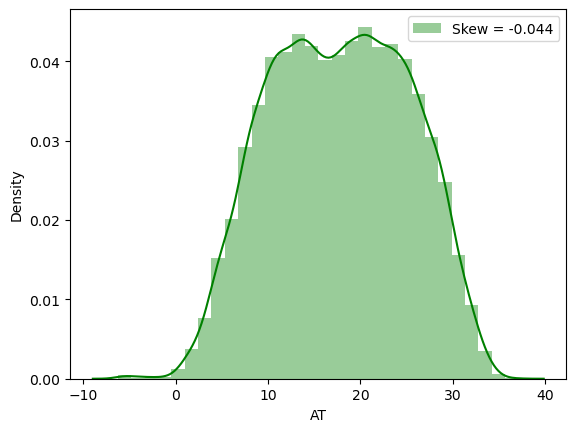

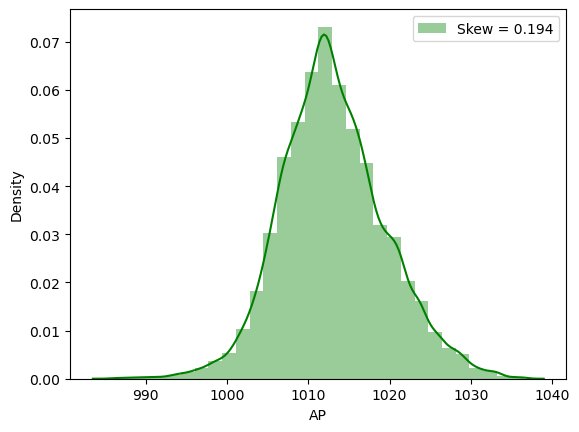

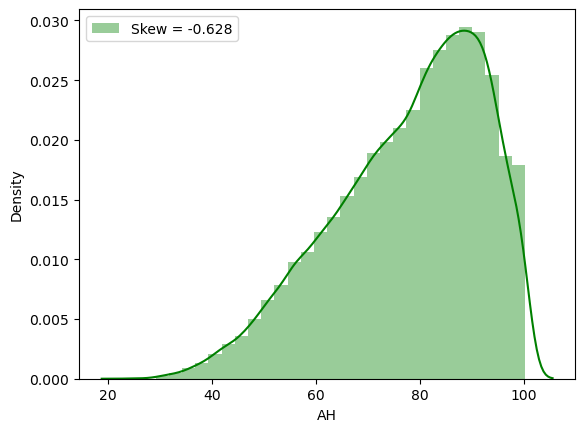

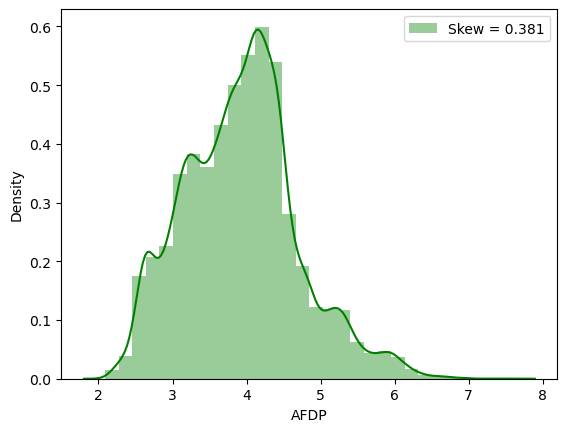

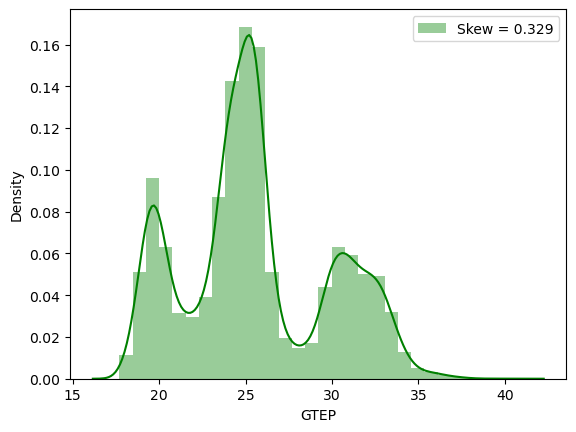

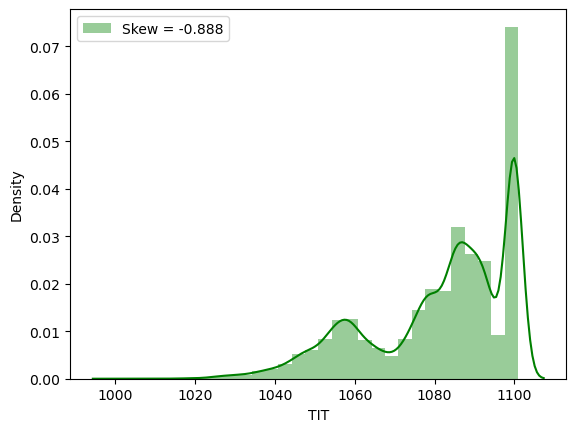

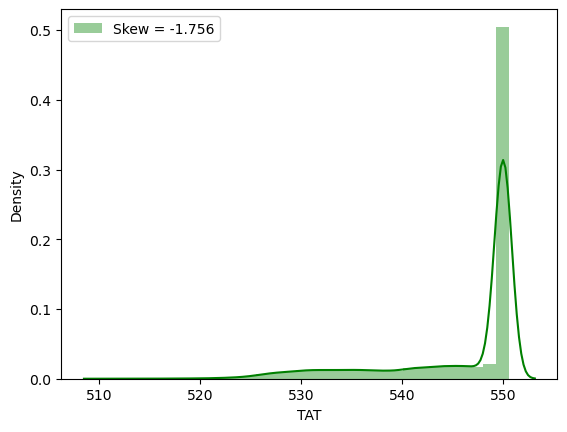

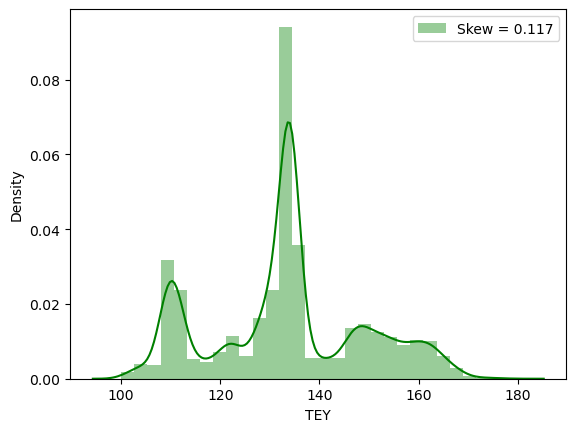

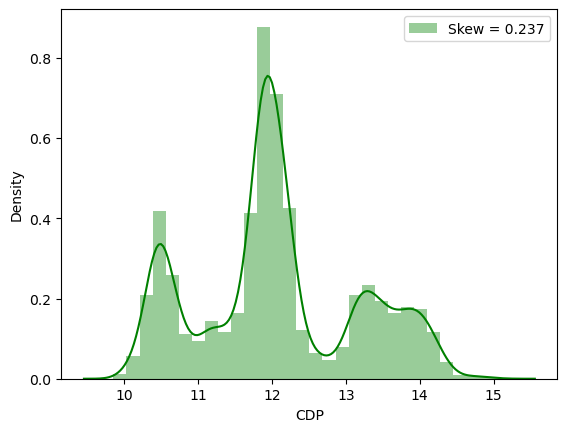

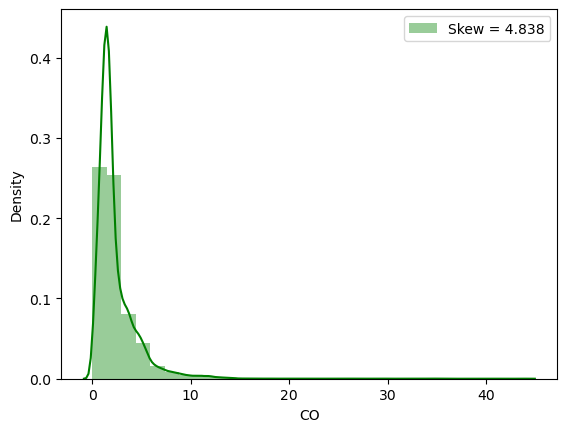

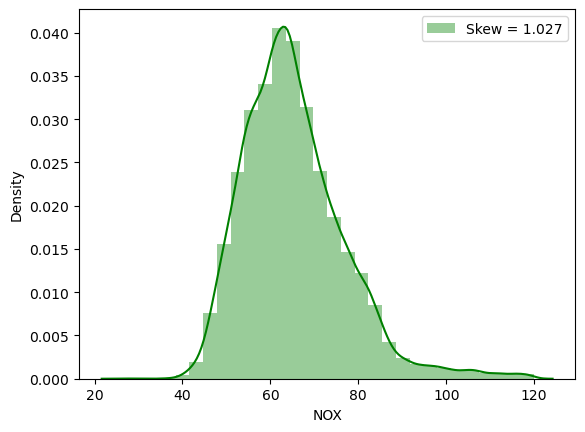

In [12]:
a=[cols for cols in df.columns if df[cols].dtypes != 'O']
for i in a:
    skew = df[i].skew()
    sns.distplot(df[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
    plt.legend(loc='best')
    plt.show();

Some of the features are normally distributed. The features AH, CO, TIT and TAT exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers. 

##### Histogram of the Target Column

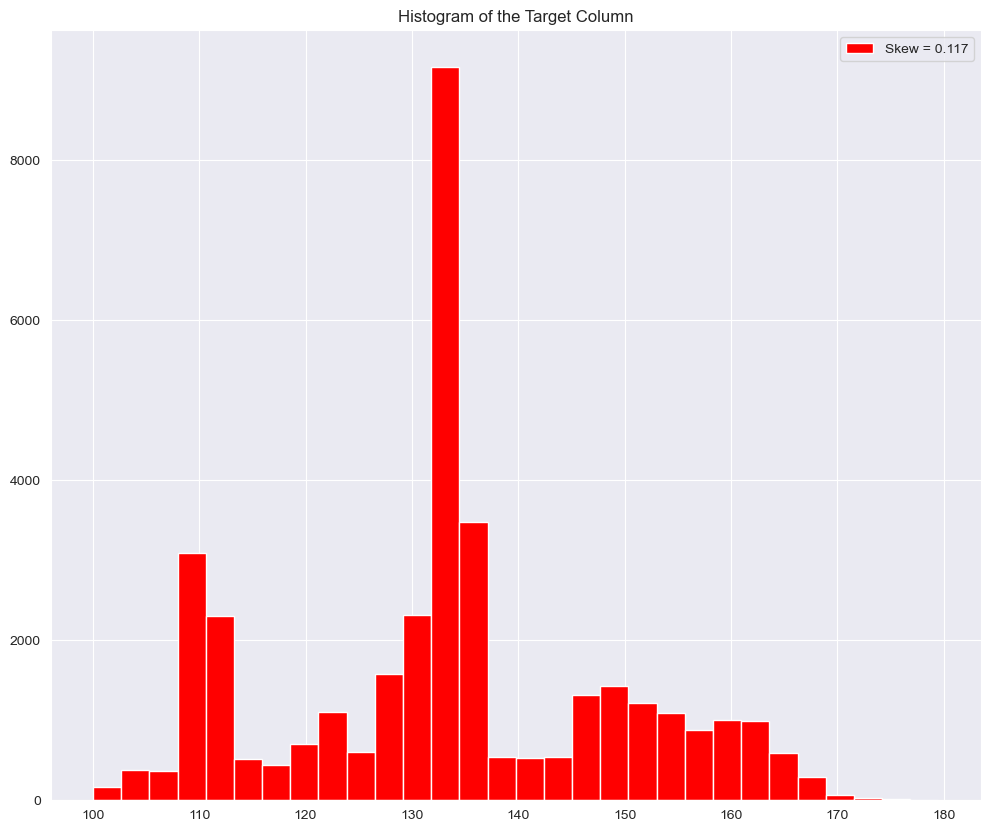

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
skew = df['TEY'].skew()
plt.hist(data=df,x="TEY",color="red",bins=30,label='Skew = %.3f'%(skew))
plt.legend(loc='best')
plt.title("Histogram of the Target Column");

Unsurprisingly, Mostly none of the features are on the same scale as we already saw in the previous section.

### Multivariate Analysis

In [14]:
# correlation
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.406601,-0.476291,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.174326,-0.558174
AP,-0.406601,1.000000,-0.015184,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.067050,0.191938
AH,-0.476291,-0.015184,1.000000,-0.147840,-0.235153,-0.221809,0.022965,-0.137360,-0.196275,0.106586,0.164617
AFDP,0.251974,-0.040363,-0.147840,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.448425,-0.188247
GTEP,0.045851,0.057533,-0.235153,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.518909,-0.201630
TIT,0.183706,-0.005390,-0.221809,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.706275,-0.213865
TAT,0.281869,-0.225601,0.022965,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,0.058353,-0.092791
TEY,-0.091152,0.118224,-0.137360,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.569813,-0.116127
CDP,0.015287,0.102636,-0.196275,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.551027,-0.171256
CO,-0.174326,0.067050,0.106586,-0.448425,-0.518909,-0.706275,0.058353,-0.569813,-0.551027,1.000000,0.340606


In [15]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988778
GTEP    0.964127
TIT     0.910297
AFDP    0.665483
AP      0.118224
AT     -0.091152
NOX    -0.116127
AH     -0.137360
CO     -0.569813
TAT    -0.682396
Name: TEY, dtype: float64

##### Pearson's Correlation Coefficient: 
Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)


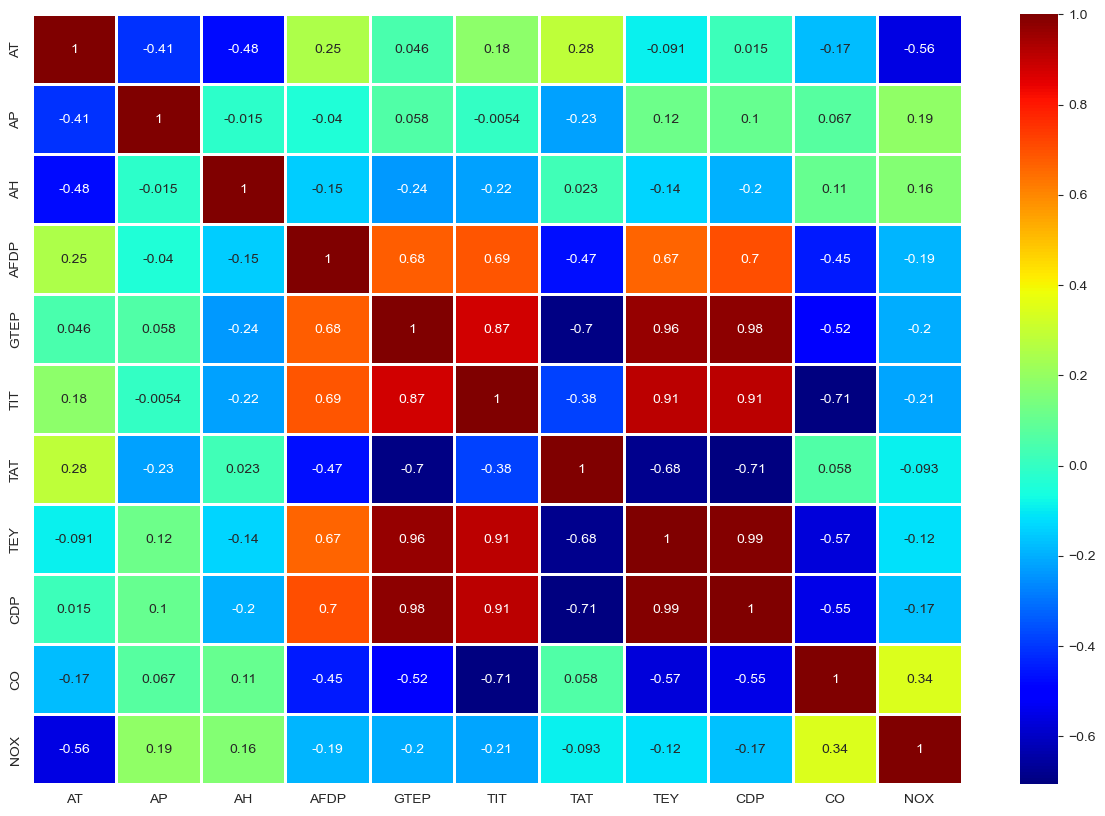

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white');

Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

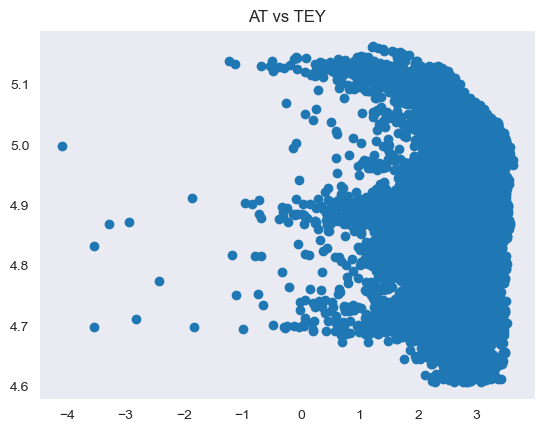

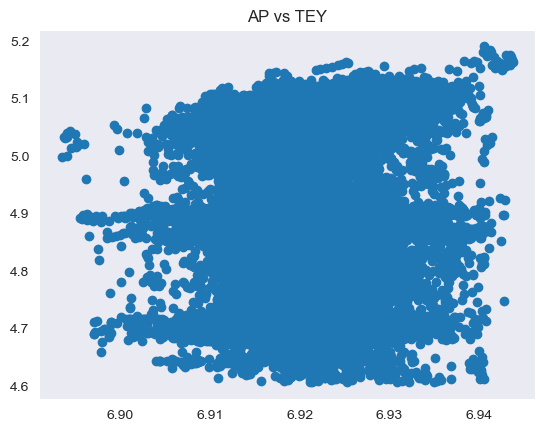

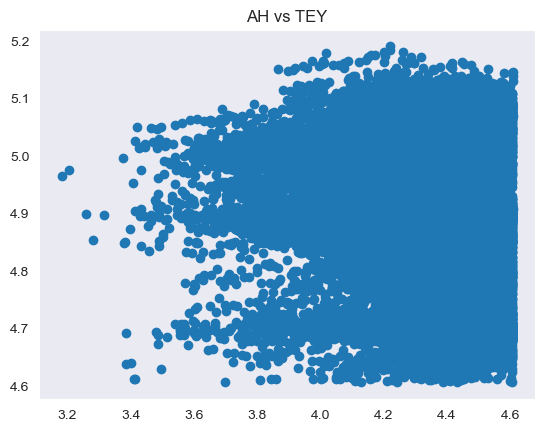

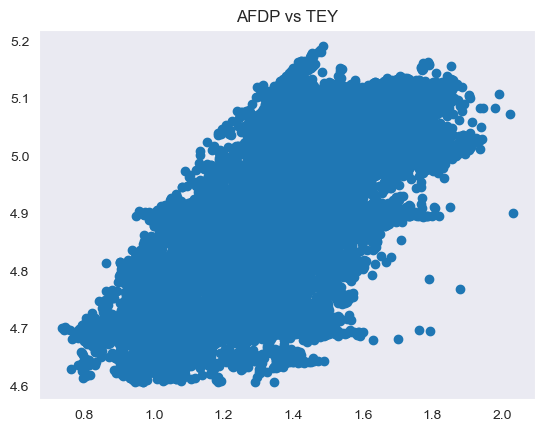

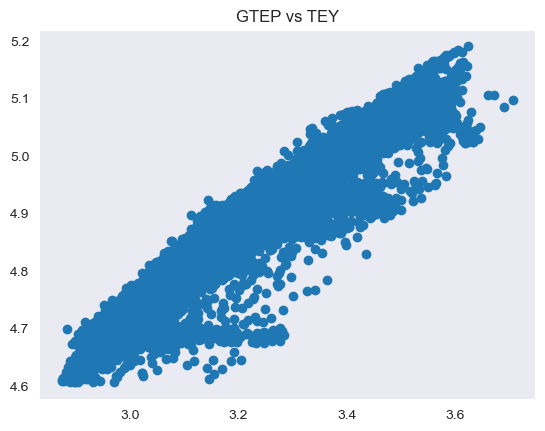

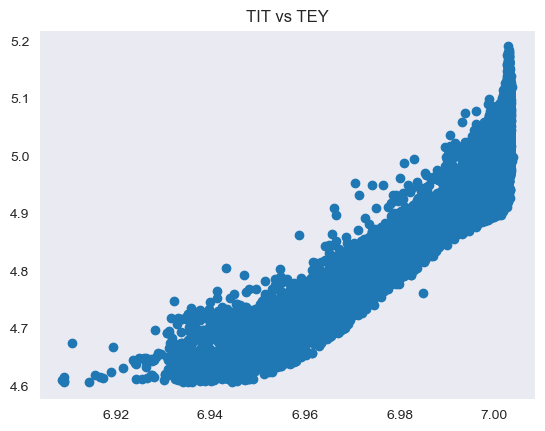

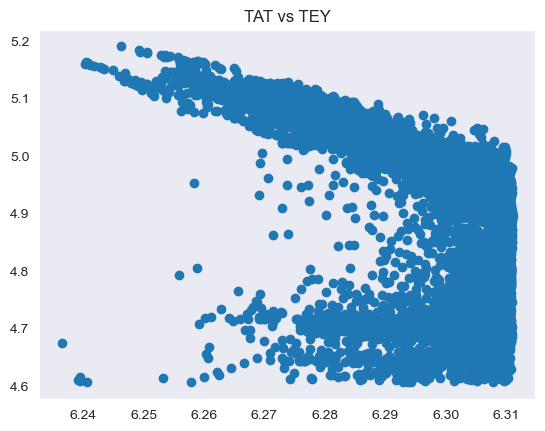

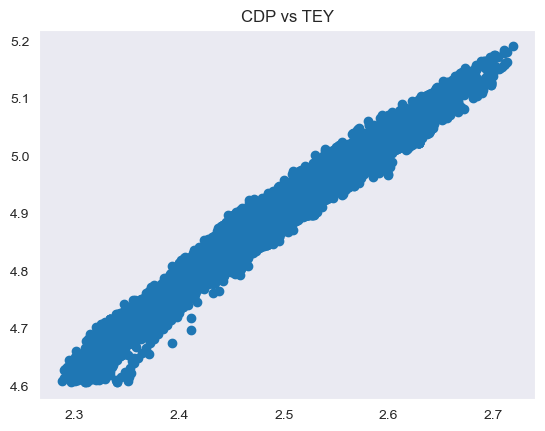

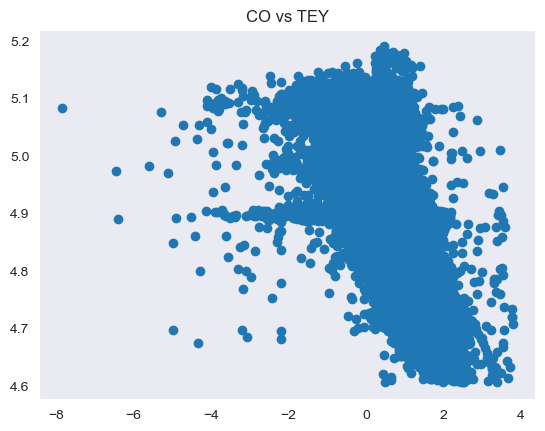

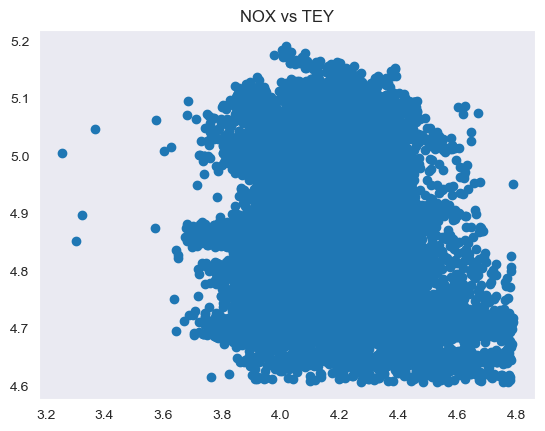

In [17]:
for a in df.columns:
    if a!="TEY": 
        plt.scatter(np.log(df[a]), np.log(df['TEY']))
        plt.title(a+ ' vs TEY')
        plt.grid()
        plt.show();

# Checking outlier

* Let's examine the boxplots for the several distributions

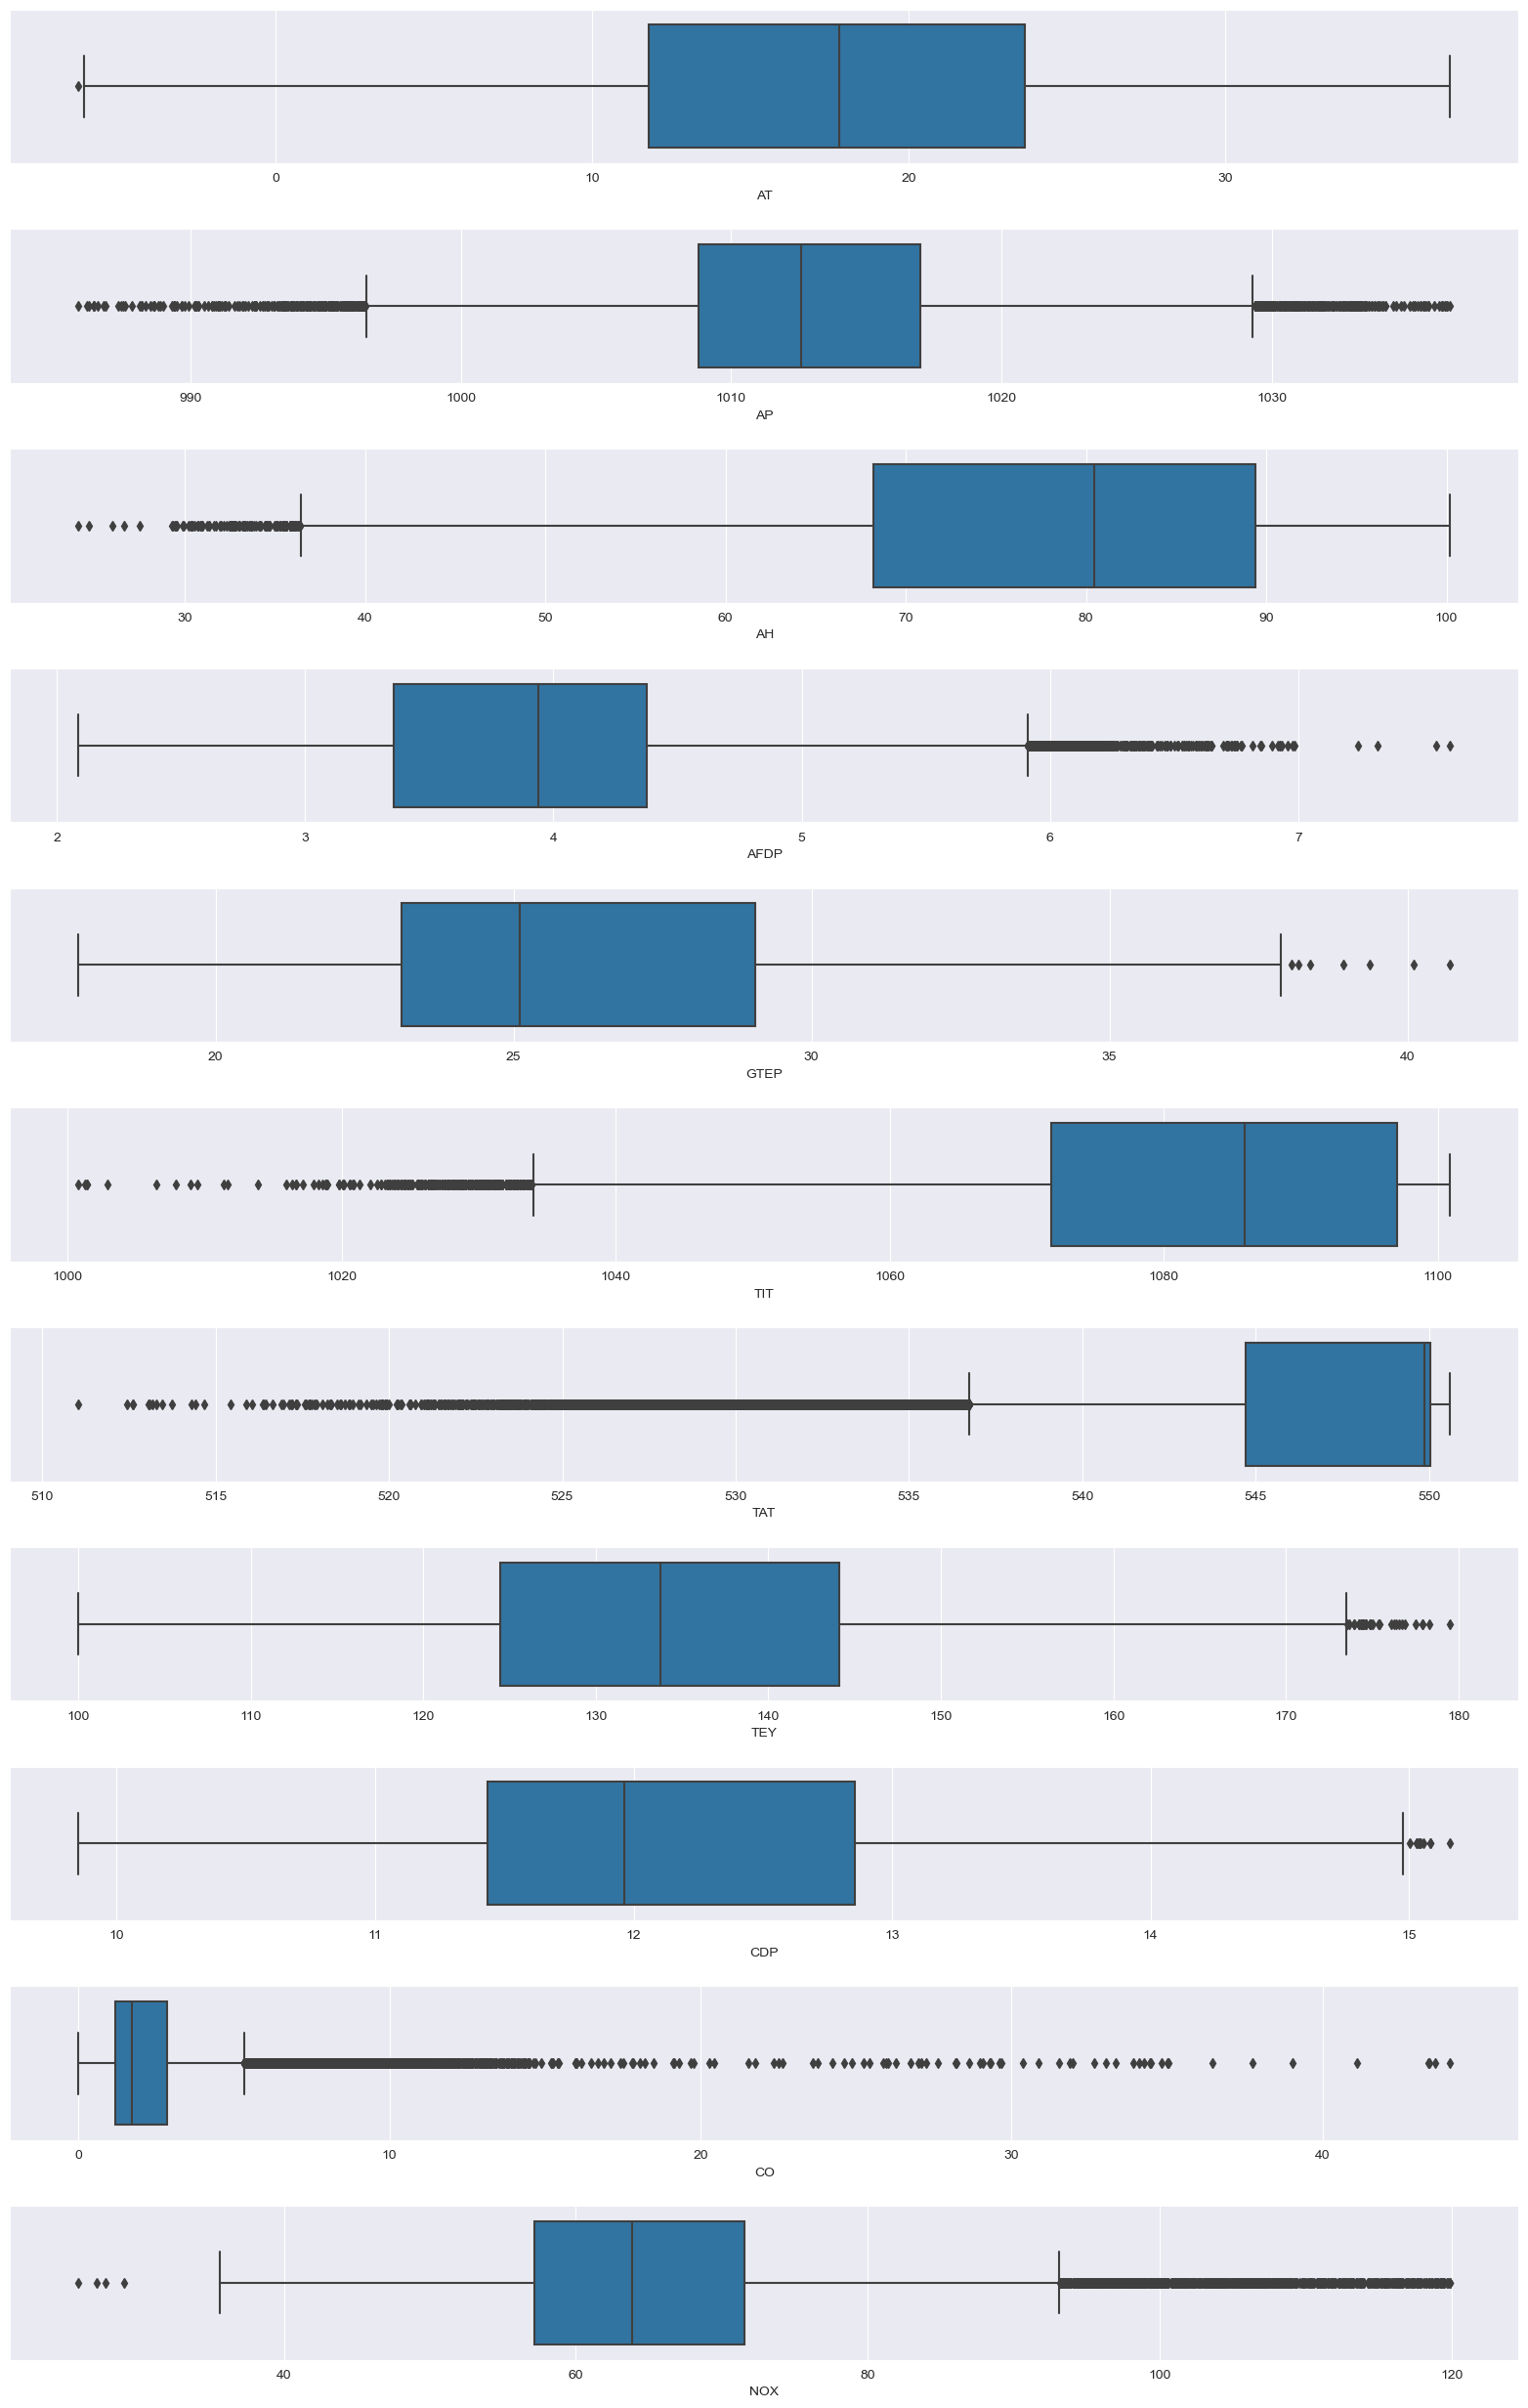

In [18]:
fig, ax=plt.subplots(11,1,figsize=(16,25))
sns.boxplot(x='AT',data=df,ax=ax[0])
sns.boxplot(x='AP',data=df,ax=ax[1])
sns.boxplot(x='AH',data=df,ax=ax[2])
sns.boxplot(x='AFDP',data=df,ax=ax[3])
sns.boxplot(x='GTEP',data=df,ax=ax[4])
sns.boxplot(x='TIT',data=df,ax=ax[5])
sns.boxplot(x='TAT',data=df,ax=ax[6])
sns.boxplot(x='TEY',data=df,ax=ax[7])
sns.boxplot(x='CDP',data=df,ax=ax[8])
sns.boxplot(x='CO',data=df,ax=ax[9])
sns.boxplot(x='NOX',data=df,ax=ax[10]);
plt.tight_layout(pad=2.0)

### Handling Outlier

In [20]:
for colname,colvals in df.iteritems():
    if colname!='TEY':
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
        continue

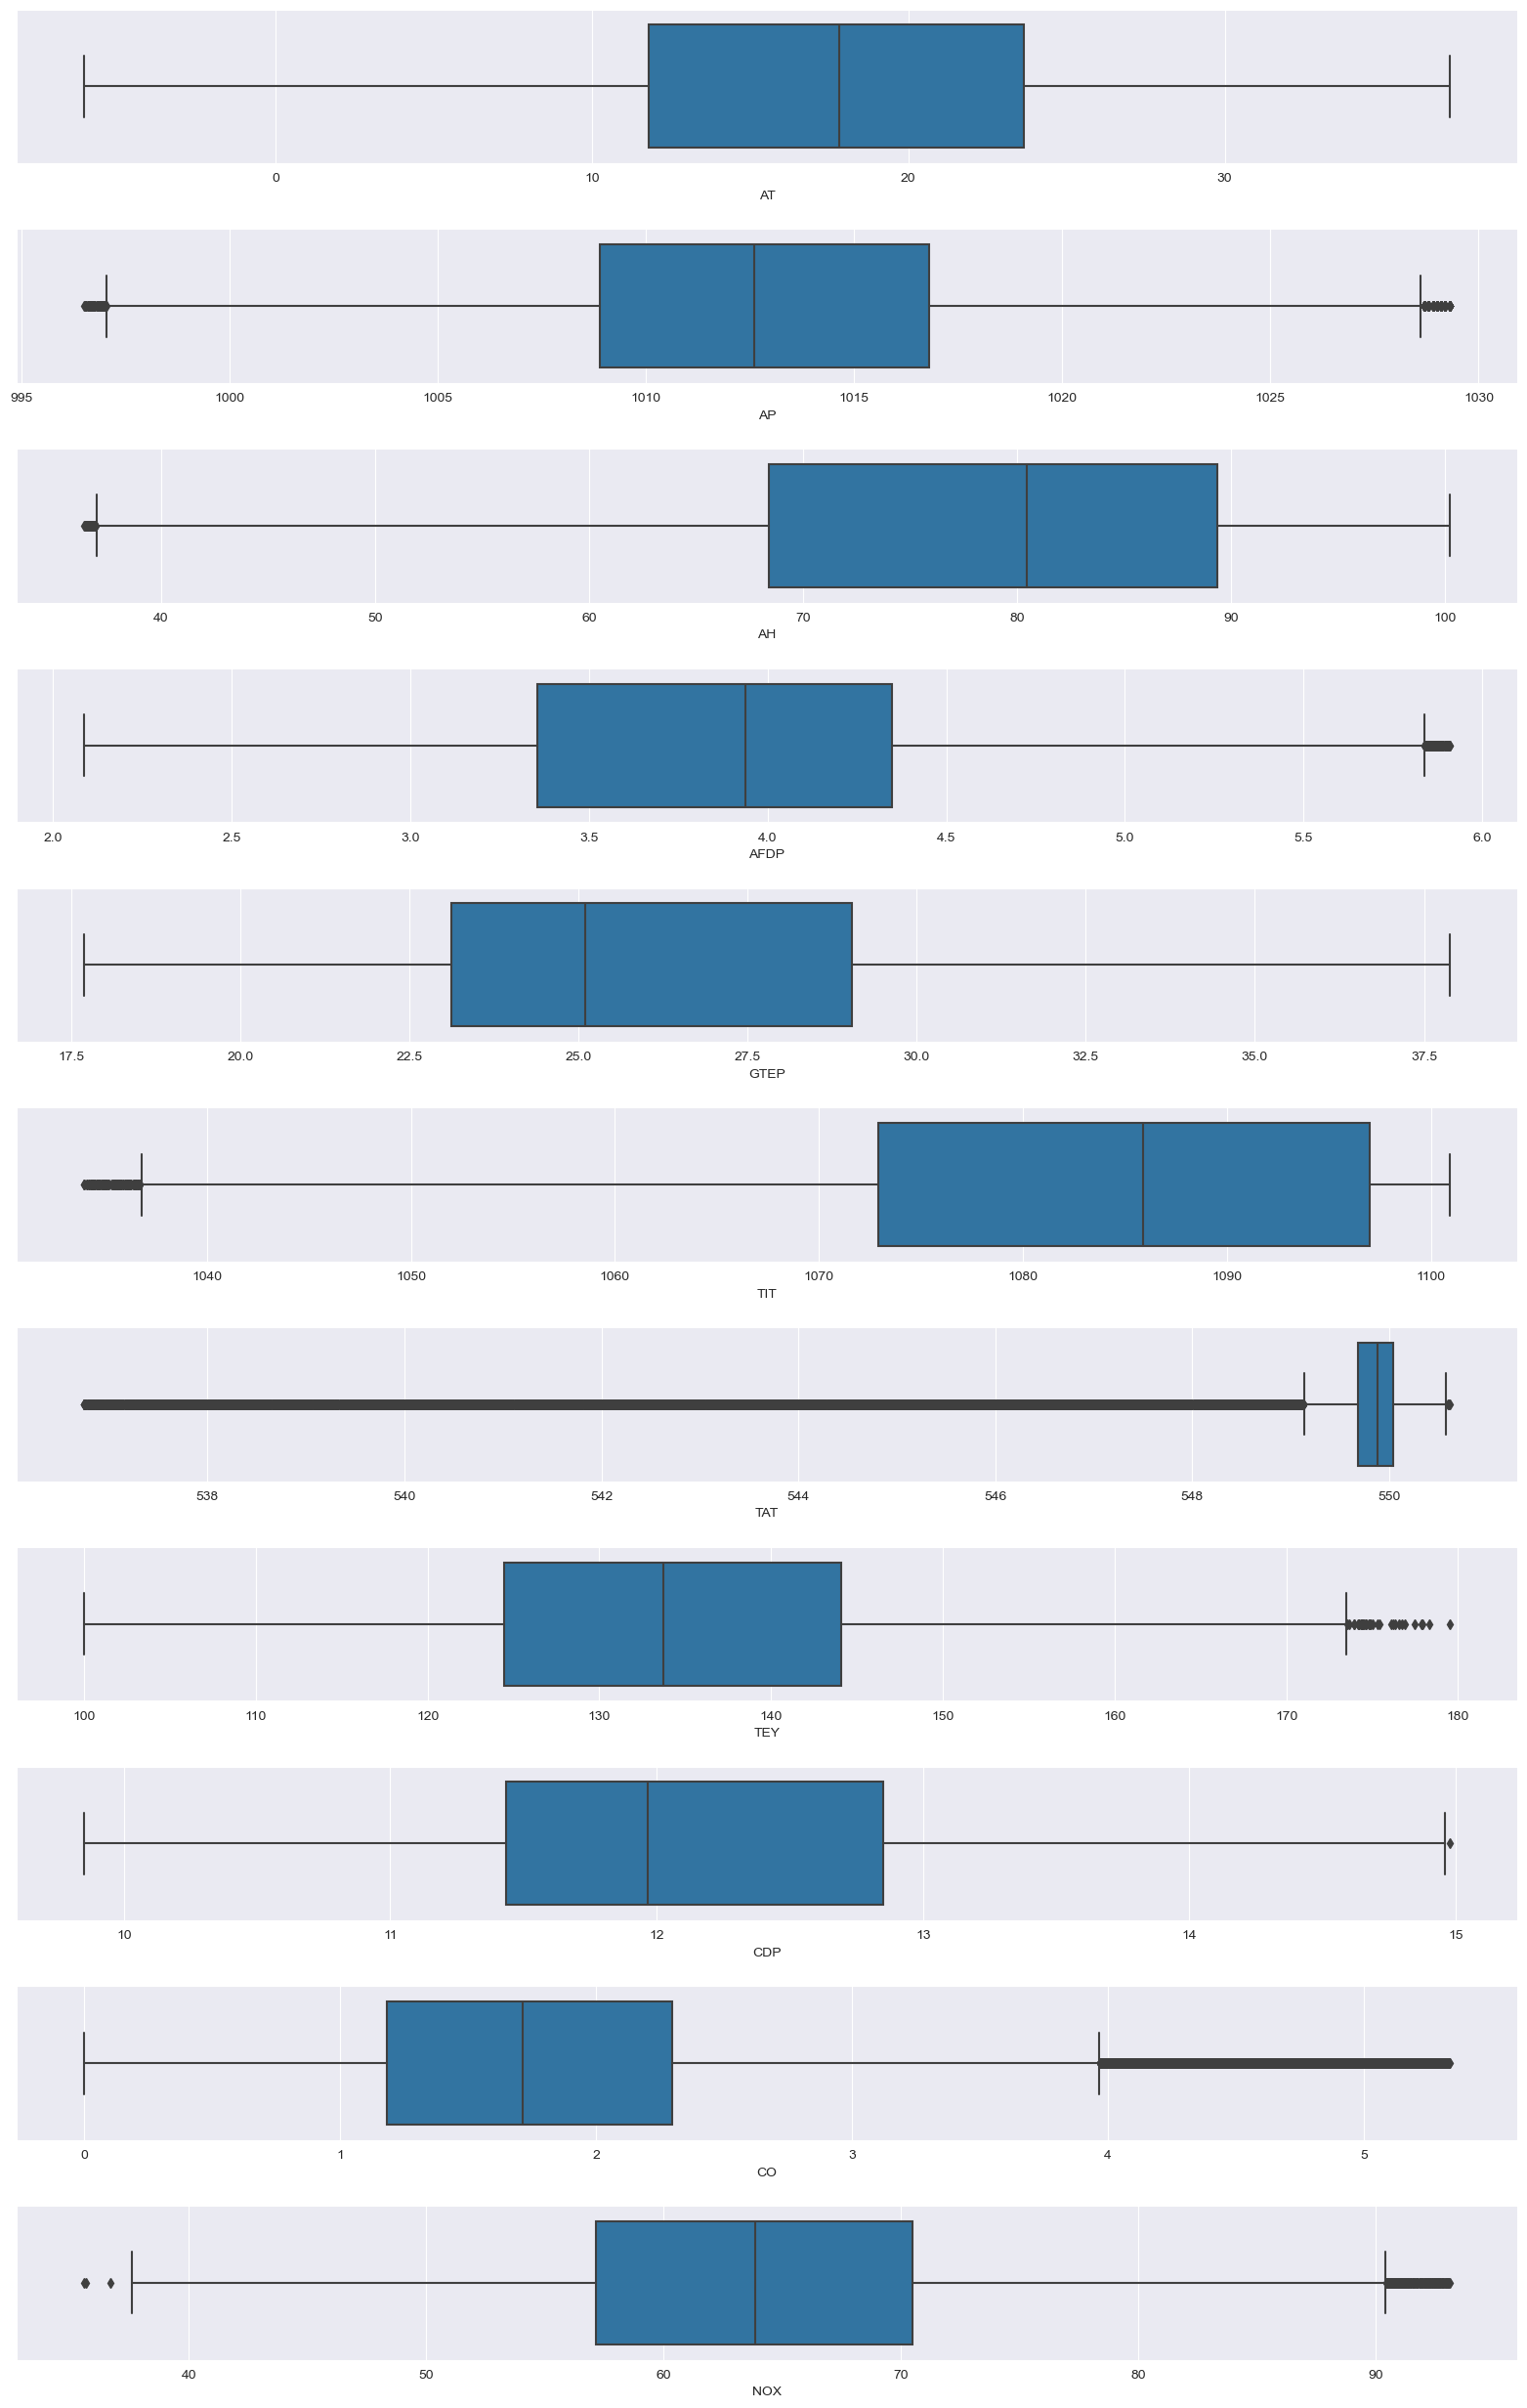

In [21]:
fig, ax=plt.subplots(11,1,figsize=(16,25))
sns.boxplot(x='AT',data=df,ax=ax[0])
sns.boxplot(x='AP',data=df,ax=ax[1])
sns.boxplot(x='AH',data=df,ax=ax[2])
sns.boxplot(x='AFDP',data=df,ax=ax[3])
sns.boxplot(x='GTEP',data=df,ax=ax[4])
sns.boxplot(x='TIT',data=df,ax=ax[5])
sns.boxplot(x='TAT',data=df,ax=ax[6])
sns.boxplot(x='TEY',data=df,ax=ax[7])
sns.boxplot(x='CDP',data=df,ax=ax[8])
sns.boxplot(x='CO',data=df,ax=ax[9])
sns.boxplot(x='NOX',data=df,ax=ax[10]);
plt.tight_layout(pad=2.0)

Mmm hmm! there exists observations with multiple outliers.

### Feature Selection Technique

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [23]:
x=df.drop('TEY', axis=1)
y = df[['TEY']]

In [24]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)
# summarize scores
scores = fit.scores_
features = fit.transform(x)
score = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score.sort_values(by="Score", ascending=False, inplace=True)
score

,Score,Feature
7,1.833403,CDP
4,1.491644,GTEP
5,1.340498,TIT
6,0.643846,TAT
3,0.496221,AFDP
8,0.481379,CO
0,0.322657,AT
9,0.269013,NOX
1,0.116698,AP
2,0.076926,AH


As per features importance CDP, GTEP, TIT, TAT, AFDP, CO these variable are very important to our prediction. IN these variable there is many outlier which is directly impact our performance measure.Values of these features are highly correlated to our target columns, thus all values of features are requried to get best accurcy. So we doesnot requried to handle outlier.

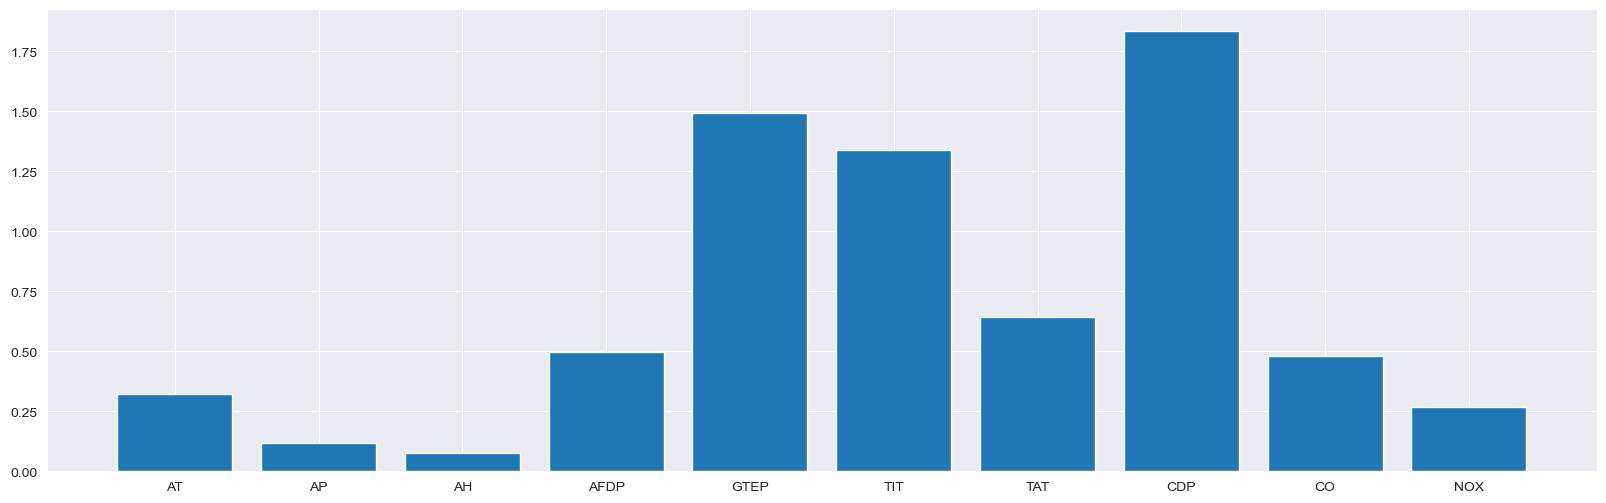

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores,)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(x.columns.values);

***

# Machine Learning Algorithm
Data is ready for algorithm

### Simple Regression

In [26]:
# selection of x(independent variables) and y(Dependent variables)
X=df[['CDP']].values.reshape(-1,1)
y=df['TEY']

In [27]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(X)

In [28]:
# spliting data the into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(std,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
simple=LinearRegression()
simple.fit(X_train,y_train)
y_train_pred=simple.predict(X_train)
y_test_pred=simple.predict(X_test)
from sklearn import metrics
print('r2_score of  Simple Regression Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Simple Regression Testing =',metrics.r2_score(y_test,y_test_pred))

r2_score of  Simple Regression Training  = 0.9756948575708027
r2_score of  Simple Regression Testing = 0.9748186033436269


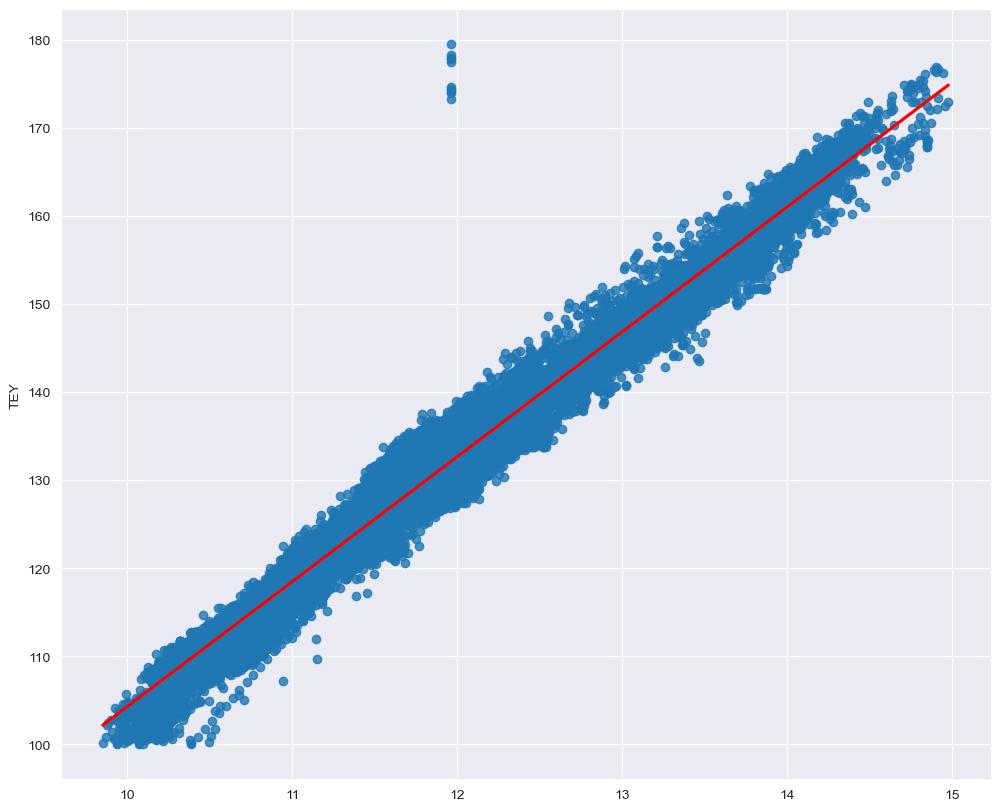

In [30]:
plt.figure(figsize=(12,10));
sns.regplot(X,y, line_kws={"color": "red"});
plt.show();

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(simple,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(simple,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

Training_accuracy 0.9756863105559563
Testing_accuracy 0.9746660693310784


In [33]:
accuracy_table= pd.DataFrame({'Algorithm':['simple linear regression'],'Training_accuracy':[train_accuracy],'Testing_accuracy':[test_accuracy]})
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666


***

selection of x(independent variables) and y(Dependent variables) for all other algorithm

In [34]:
# selection of x(independent variables) and y(Dependent variables)
X=df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT']]
y = df["TEY"]

In [35]:
X.shape

(36733, 7)

In [36]:
y.shape

(36733,)

##### Applying Standard Scaler
* For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
* x_scaled = x – mean/std_dev
* However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [37]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(X)

##### Train Test Split : 
* To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

In [38]:
# spliting data the into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(std,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape

(29386, 7)

In [40]:
X_test.shape

(7347, 7)

In [41]:
y_train.shape

(29386,)

In [42]:
y_test.shape

(7347,)

***

### Multiple Regression

In [43]:
from sklearn.linear_model import LinearRegression
lrg=LinearRegression()
lrg.fit(X_train,y_train)
y_train_pred=lrg.predict(X_train)
y_test_pred=lrg.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  Multiple Regression Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Multiple Regression Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  Multiple Regression Training  = 0.9909626012346073
r2_score of  Multiple Regression Testing = 0.9904396784827197


In [44]:
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(lrg,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(lrg,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

Training_accuracy 0.9909346103860692
Testing_accuracy 0.9902692961331772


In [45]:
accuracy_table = accuracy_table.append({'Algorithm':'multiple linear regression','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269


***

### Decision tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(max_depth=2)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [47]:
y_train_pred=DTR.predict(X_train)
y_test_pred=DTR.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  Decision Tree Regression Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Decision Tree Regression Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  Decision Tree Regression Training  = 0.9343502614465945
r2_score of  Decision Tree Regression Testing = 0.9297614910653662


In [48]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(DTR,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(DTR,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.934122605613269
Testing_accuracy 0.9293287412458373


In [49]:
accuracy_table = accuracy_table.append({'Algorithm':'Decision Tree regression','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329


***

### Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100)
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
y_train_pred=RFR.predict(X_train)
y_test_pred=RFR.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  Random Forest Regression Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Random Forest Regression Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  Random Forest Regression Training  = 0.9997350889622382
r2_score of  Random Forest Regression Testing = 0.9980960428178549


In [52]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(RFR,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(RFR,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.9980551839607422
Testing_accuracy 0.9969553175770904


In [53]:
accuracy_table = accuracy_table.append({'Algorithm':'Random Forest regression','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955


# K-Nearest Neighbor(KNN)

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [55]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  KNN Regression Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  KNN Regression Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  KNN Regression Training  = 0.9975711119639569
r2_score of  KNN Regression Testing = 0.9958585920862569


In [56]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(knn,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(knn,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.9960164413775059
Testing_accuracy 0.9927880902928233


In [57]:
accuracy_table = accuracy_table.append({'Algorithm':'KNN regression','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955
4,KNN regression,0.996016,0.992788


***

### Support Vector Regression

In [58]:
from sklearn.svm import SVR
SVR=SVR()
SVR.fit(X_train,y_train)

SVR()

In [59]:
y_train_pred=SVR.predict(X_train)
y_test_pred=SVR.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  Support Vector Regression Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Support Vector Regression Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  Support Vector Regression Training  = 0.995390702560656
r2_score of  Support Vector Regression Testing = 0.994823206650473


In [60]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(SVR,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(SVR,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.9951122230587354
Testing_accuracy 0.9894156017995483


In [61]:
accuracy_table = accuracy_table.append({'Algorithm':'support vector regression','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955
4,KNN regression,0.996016,0.992788
5,support vector regression,0.995112,0.989416


***

# Ensemble techniques

### Bagging/Bootstrap aggrigation

In [62]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg_Bag=BaggingRegressor(DecisionTreeRegressor(),n_estimators=500,bootstrap=True,random_state=42)
bag_reg_Bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=500,
                 random_state=42)

In [63]:
y_train_pred=bag_reg_Bag.predict(X_train)
y_test_pred=bag_reg_Bag.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  Bagging/Bootstrap aggrigation Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Bagging/Bootstrap aggrigation Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  Bagging/Bootstrap aggrigation Training  = 0.9997469911826987
r2_score of  Bagging/Bootstrap aggrigation Testing = 0.9981264490017979


In [64]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(bag_reg_Bag,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(bag_reg_Bag,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.9980819203427178
Testing_accuracy 0.9970006491003349


In [65]:
accuracy_table = accuracy_table.append({'Algorithm':' Bagging/Bootstrap aggrigation','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955
4,KNN regression,0.996016,0.992788
5,support vector regression,0.995112,0.989416
6,Bagging/Bootstrap aggrigation,0.998082,0.997001


***

### pasting

In [66]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg_past=BaggingRegressor(DecisionTreeRegressor(),n_estimators=500,bootstrap=False,random_state=42)
bag_reg_past.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 n_estimators=500, random_state=42)

In [67]:
y_train_pred=bag_reg_past.predict(X_train)
y_test_pred=bag_reg_past.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  Bagging/Bootstrap aggrigation Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Bagging/Bootstrap aggrigation Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  Bagging/Bootstrap aggrigation Training  = 1.0
r2_score of  Bagging/Bootstrap aggrigation Testing = 0.9962755307926229


In [68]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(bag_reg_past,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(bag_reg_past,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.9962542740911926
Testing_accuracy 0.9948676462709335


In [69]:
accuracy_table = accuracy_table.append({'Algorithm':'Pasting','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955
4,KNN regression,0.996016,0.992788
5,support vector regression,0.995112,0.989416
6,Bagging/Bootstrap aggrigation,0.998082,0.997001
7,Pasting,0.996254,0.994868


***

### Adaboosta

In [70]:
from sklearn.ensemble import AdaBoostRegressor
adaboost=AdaBoostRegressor(random_state=42)
adaboost.fit(X_train,y_train)

AdaBoostRegressor(random_state=42)

In [71]:
y_train_pred=adaboost.predict(X_train)
y_test_pred=adaboost.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  AdaBoost Regressoion Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of AdaBoost Regressoion Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  AdaBoost Regressoion Training  = 0.979902531019243
r2_score of AdaBoost Regressoion Testing = 0.9790750138250095


In [72]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(adaboost,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(adaboost,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.9800994640437077
Testing_accuracy 0.9799448020793007


In [73]:
accuracy_table = accuracy_table.append({'Algorithm':' AdaBoost Regressoion','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955
4,KNN regression,0.996016,0.992788
5,support vector regression,0.995112,0.989416
6,Bagging/Bootstrap aggrigation,0.998082,0.997001
7,Pasting,0.996254,0.994868
8,AdaBoost Regressoion,0.980099,0.979945


***

### Gradient boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor(random_state=40,learning_rate=0.1)
grad_reg.fit(X_train,y_train)

GradientBoostingRegressor(random_state=40)

In [75]:
y_train_pred=grad_reg.predict(X_train)
y_test_pred=grad_reg.predict(X_test)
print('Before cross validation\n')
from sklearn import metrics
print('r2_score of  Gradient boosting aggrigation Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Gradient boosting aggrigation Testing =',metrics.r2_score(y_test,y_test_pred))

Before cross validation

r2_score of  Gradient boosting aggrigation Training  = 0.99633345189686
r2_score of  Gradient boosting aggrigation Testing = 0.9958946193566102


In [76]:
print('after cross validation')
k = 10
fold = KFold(n_splits=k)
result_train = cross_val_score(grad_reg,X_train,y_train,cv=fold)
train_accuracy=np.mean(abs(result_train))
print('Training_accuracy',train_accuracy)
fold = KFold(n_splits=k)
result_test = cross_val_score(grad_reg,X_test,y_test,cv=fold)
test_accuracy=np.mean(abs(result_test))
print('Testing_accuracy',test_accuracy)

after cross validation
Training_accuracy 0.9959781032167593
Testing_accuracy 0.9956104182779443


In [77]:
accuracy_table = accuracy_table.append({'Algorithm':'Gradient boosting','Training_accuracy':train_accuracy,'Testing_accuracy':test_accuracy}, ignore_index = True)
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955
4,KNN regression,0.996016,0.992788
5,support vector regression,0.995112,0.989416
6,Bagging/Bootstrap aggrigation,0.998082,0.997001
7,Pasting,0.996254,0.994868
8,AdaBoost Regressoion,0.980099,0.979945
9,Gradient boosting,0.995978,0.995610


***

# comparision of All Algorithm

In [90]:
accuracy_table

,Algorithm,Training_accuracy,Testing_accuracy
0,simple linear regression,0.975686,0.974666
1,multiple linear regression,0.990935,0.990269
2,Decision Tree regression,0.934123,0.929329
3,Random Forest regression,0.998055,0.996955
4,KNN regression,0.996016,0.992788
5,support vector regression,0.995112,0.989416
6,Bagging/Bootstrap aggrigation,0.998082,0.997001
7,Pasting,0.996254,0.994868
8,AdaBoost Regressoion,0.980099,0.979945
9,Gradient boosting,0.995978,0.995610


### from above table se can see that bagging gives highest accuracy

***

***

#### Predicting values from Model using same dataset

In [91]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': bag_reg_Bag.predict(X_test)})
mlr_diff.head(10)

,Actual value,Predicted value
6637,154.88,154.63892
4009,132.76,133.17260
2951,108.59,109.12168
263,160.10,159.56532
5568,131.03,130.56848
518,134.46,133.85300
2320,134.68,134.28236
4899,129.08,129.14956
315,164.34,164.77306
1582,148.72,151.97908


#### The Scatterplot of Relationship between Actual Values and Predictions

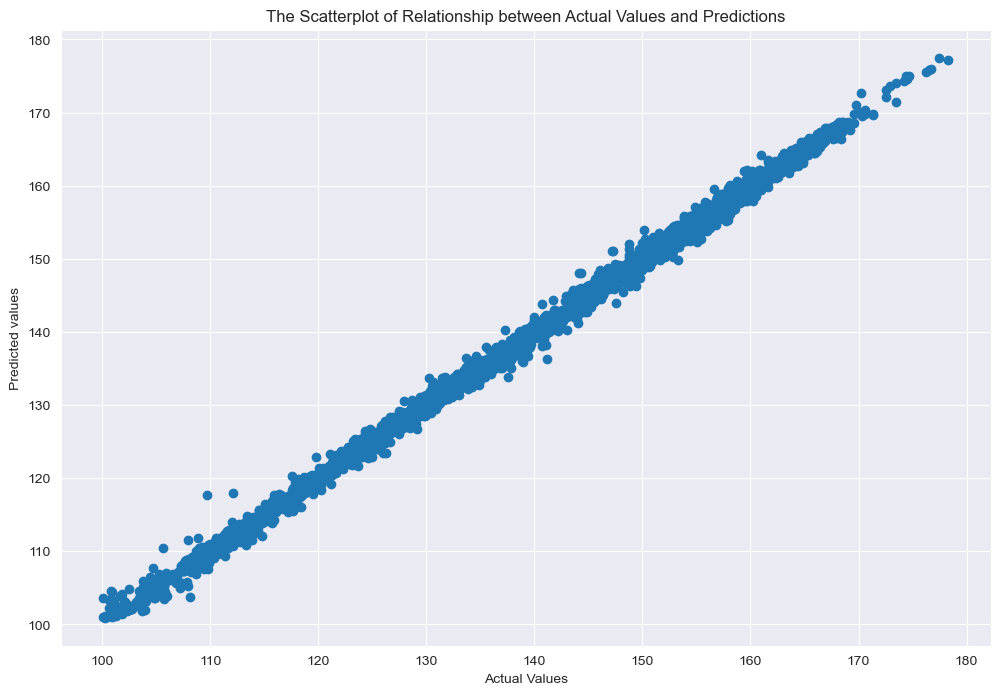

In [92]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(mlr_diff['Actual value'], mlr_diff['Predicted value']);
     

#### predictions for new Data

In [93]:
# generating predictions for new Data
l=[(11,20,1111,560,3.5,12,4)]
i=np.array(l)
y_pred = bag_reg_Bag.predict(i)
# creating table with test & predicted for test
print('predictions for new Data :',y_pred)

predictions for new Data : [169.20666]


### *** ♡ Thank you for taking the time ♡ ***